In [1]:
%pylab inline
import yt

Populating the interactive namespace from numpy and matplotlib


In [2]:
import thingking
import matplotlib.colors as col
import matplotlib.cm as cm
import sys, string, math

def discrete_cmap(N=8):
    """create a colormap with N (N<15) discrete colors and register it"""
    # define individual colors as hex values
    cpool = [ '#000000', '#ff0000', '#00e000', '#0000ff', '#00e0e0',
              '#ff00ff', '#e0e000', '#ffa500', '#ee82ee', '#808080',
              '#800000', '#008000', '#000080', '#808000', '#800080' ]
    cmap3 = col.ListedColormap(cpool[0:N], 'indexed')
    cm.register_cmap(cmap=cmap3)

discrete_cmap(5)
color=cm.get_cmap('indexed')

mf_prefix = "http://darksky.slac.stanford.edu/data_release/mass_function/"
mfs = [
    "ds14_a_halos_1.0000.hist8_m200b"#,
#     "ds14_g_1600_4096_m200b_1.0000.hist8_m200b",
#     "ds14_g_800_4096_m200b_1.0000.hist8_m200b",
#     "ds14_g_200_2048_m200b_1.0000.hist8_m200b",
#     "ds14_g_100_2048_m200b_1.0000.hist8_m200b",
]
mfs = [mf_prefix + mf for mf in mfs]

In [3]:
halo_catalog = np.loadtxt("../../darksky_catalog/ds14_a_halos_1.0000_filter_1e15.txt",skiprows=3)

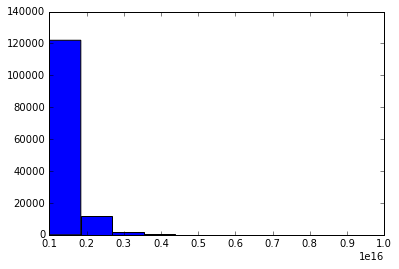

In [4]:
m200b= halo_catalog[:,4]
n_1, bins, patches  = plt.hist(m200b)#,log=True)#,histtype='step',color="red");
# n_1,bins = np.histogram(m200b)
# plt.xlabel("m200b",fontsize = 15)
# plt.ylabel("Count",fontsize = 15)

In [5]:
n_1

array([  1.22021000e+05,   1.20330000e+04,   1.96700000e+03,
         4.46000000e+02,   8.80000000e+01,   3.00000000e+01,
         3.00000000e+00,   2.00000000e+00,   1.00000000e+00,
         1.00000000e+00])

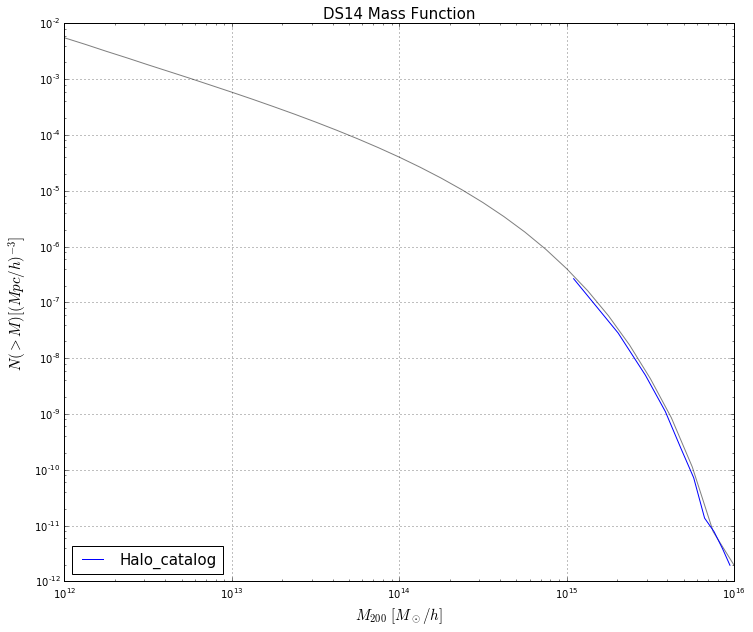

In [6]:
V = 8000**3
i=0
fig = plt.figure(figsize=(12,10))
xx = fig.add_subplot(111)
vols = np.array([8000.0, 1600, 800, 200, 100])
for aname, vol in zip(mfs, vols):
    bin_center_mass, dn_dlnM, sigma, dlogsdlogm, lower_pmass, n, expected, dm, ds, dlnm, dlns = thingking.loadtxt(aname, unpack=True)
    tag = aname.split("/")[-1]
    mask = (lower_pmass[:] >= 0) * (n[:] >= 0)
    if n.sum() > 0:
        ngtm = np.cumsum(n[mask][::-1])[::-1]
        xx.loglog(bin_center_mass[mask], ngtm/vol**3,ms=4, mec='None', color="gray")#,label="ds14_histo8* data")#, label=tag)
    i += 1

ngtm = np.cumsum(n_1[::-1])[::-1]
a=1.1
xx.loglog(bins[:-1]*a, ngtm/V,label="Halo_catalog",ms=4, mec='None',color="blue")
# ngtm2 = np.cumsum(n_2[::-1])[::-1]
# xx.loglog(bins[:-1], ngtm2/V,label="Clustered results",ms=4, mec='None',color="red")

xx.set_title('DS14 Mass Function',fontsize=15)
xx.set_xscale('log')
xx.set_yscale('log')
xx.set_xlabel('$M_{200}\  [M_\odot/h]$', fontdict={'fontsize':14},fontsize=15)
xx.set_ylabel('$N(>M) [(Mpc/h)^{-3}]$', fontdict={'fontsize':14},fontsize=15)
leg = xx.legend(loc="lower left",labelspacing=.5,fontsize=15)
xx.xaxis.grid(True, which='major')
xx.yaxis.grid(True, which='major')
plt.xlim(1e12,1e16)
plt.show()

(0, 4000000000000000.0)

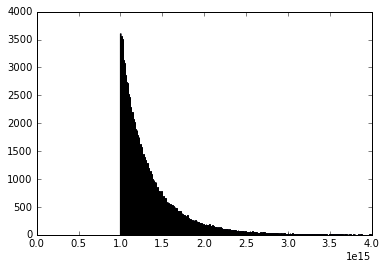

In [11]:
_  = plt.hist(m200b,1000)
plt.xlim(0,0.4e16)

In [14]:
m =3.9e10 #particle mass
mean(m200b)/m

35141.566827195267

In [22]:
print "If the average particle number is 50 then the average mass per clsuter would be : ", 50*m

If the average particle number is 50 then the average mass per clsuter would be :  1.95e+12


Which sort of corresponds to what we saw in our clustered result when we use k=50

So for the 1 billion particle run lets choose , average particle number as = 35000

In [21]:
1e9/35000.

28571.428571428572

so let k = 28000